Shreyansh Misra

# I. Creating the Datasets

### Importing Dependencies

In [1]:
import requests
import re
import numpy as np
from bs4 import BeautifulSoup as bs

### List of S&P500 Compaines and their Weights

The S&P500 is an index tracking the stock performance of the top 500 publicly traded companies in the United States by market capitalization. The depth and diversity of the index makes it one of the best gagues of prominent American equities' performance, and by extension, that of the stock market overall. This dataset was selected as companies within the S&P500 are well established and have large market capitalizations in a variety of industires, thereby making them low-risk equities for investment.

In [2]:
sp500_url = "https://thirsty-golick-fbd29a.netlify.app/table"

### Web Scraping

In [3]:
res = requests.get(sp500_url)
soup = bs(res.text, 'html.parser')

table = soup.findAll('table')[0].findAll('tbody')

### List of Stock Tickers

In [4]:
SP500 = []

#
for i, ticker in enumerate(table[0]):
    if len(ticker) > 1:
        
        #
        text = re.sub(r"[<trd>]", "", str(ticker))
        text = text.split('/')
        
        SP500.append(text[4])
        
        
SP500[0], SP500[1], SP500[2]

('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"MSFT',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"AAPL',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"AMZN')

### Cleaning Tickers Dataset

In [5]:
# removing text styling prefix
SP500 = [value.removeprefix('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"') for value in SP500]

# removing element 99 "span"
SP500.pop(99)


print(SP500)

['MSFT', 'AAPL', 'AMZN', 'TSLA', 'GOOGL', 'GOOG', 'FB', 'NVDA', 'BRK.B', 'JPM', 'JNJ', 'UNH', 'HD', 'V', 'PG', 'BAC', 'DIS', 'ADBE', 'MA', 'CRM', 'NFLX', 'XOM', 'PFE', 'PYPL', 'CMCSA', 'TMO', 'CSCO', 'ACN', 'PEP', 'AVGO', 'NKE', 'COST', 'CVX', 'KO', 'ABT', 'VZ', 'WMT', 'LLY', 'WFC', 'ABBV', 'INTC', 'MRK', 'MCD', 'DHR', 'QCOM', 'T', 'TXN', 'LIN', 'INTU', 'NEE', 'LOW', 'AMD', 'MDT', 'ORCL', 'HON', 'UNP', 'UPS', 'PM', 'MS', 'AMAT', 'SBUX', 'RTX', 'GS', 'NOW', 'BLK', 'C', 'BMY', 'ISRG', 'AMT', 'TGT', 'CVS', 'BA', 'SCHW', 'AMGN', 'GE', 'AXP', 'CAT', 'SPGI', 'IBM', 'PLD', 'BKNG', 'MMM', 'ANTM', 'ZTS', 'COP', 'DE', 'ADI', 'ADP', 'SYK', 'PNC', 'CHTR', 'LRCX', 'MDLZ', 'TJX', 'TFC', 'GM', 'CB', 'LMT', 'MO', 'GILD', 'MU', 'USB', 'MMC', 'EL', 'CSX', 'CME', 'DUK', 'CCI', 'SHW', 'ICE', 'F', 'EW', 'CI', 'TMUS', 'ADSK', 'FIS', 'EQIX', 'NSC', 'BDX', 'COF', 'APD', 'ETN', 'ITW', 'SO', 'CL', 'AON', 'REGN', 'KLAC', 'MCO', 'WM', 'D', 'DXCM', 'BSX', 'HCA', 'ILMN', 'FISV', 'FDX', 'NXPI', 'EMR', 'HUM', 'ECL', 

### List of Stock Tickers

In [6]:
weight500 = []

#
for i, ticker in enumerate(table[0]):
    if len(ticker) > 1:
        
        text = re.sub(r"[<trd>]", "", str(ticker))
        text = text.split('/')
        
        weight500.append(text[6])

weight500[0], weight500[1], weight500[2]

('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"6.33576',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"5.95990',
 '\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"3.84511')

### Cleaning Weights Dataset

In [7]:
# removing text styling prefix
weight500 = [value.removeprefix('\n class="g-0lax"span syle="fon-weigh:400;fon-syle:nomal;ex-ecoaion:none;colo:#000;backgoun-colo:anspaen"') for value in weight500]

# removing element 99 "span"
weight500.pop(99)

'span'

### Converting Weights from Percentage to Decimals

In [8]:
# converting weight500 elements from strings to floats
weight500 = list(np.float_(weight500))

# dividing all weights by 100
weight500[:] = [x / 100 for x in weight500]

# round all weights to four decimal places
weight500[:] = [round(num, 4) for num in weight500]

# weights cannot equal zero
if any(i == 0.0000 for i in weight500):
    print("Fail")
else:
    print("Pass")

print(weight500)

Pass
[0.0634, 0.0596, 0.0385, 0.0249, 0.0225, 0.0211, 0.0204, 0.0186, 0.0134, 0.0126, 0.0108, 0.0108, 0.0098, 0.0092, 0.0089, 0.0087, 0.008, 0.0079, 0.0076, 0.0075, 0.0072, 0.0069, 0.0068, 0.0067, 0.0062, 0.0061, 0.006, 0.0059, 0.0058, 0.0058, 0.0057, 0.0057, 0.0056, 0.0055, 0.0055, 0.0054, 0.0054, 0.0053, 0.0052, 0.0052, 0.0052, 0.0052, 0.0048, 0.0047, 0.0046, 0.0045, 0.0045, 0.0043, 0.0042, 0.0042, 0.0042, 0.0042, 0.0041, 0.0039, 0.0039, 0.0039, 0.0038, 0.0037, 0.0037, 0.0035, 0.0035, 0.0035, 0.0034, 0.0034, 0.0034, 0.0034, 0.0033, 0.0033, 0.0032, 0.0032, 0.0031, 0.0031, 0.0031, 0.003, 0.003, 0.0029, 0.0028, 0.0028, 0.0028, 0.0027, 0.0027, 0.0026, 0.0026, 0.0026, 0.0025, 0.0025, 0.0025, 0.0024, 0.0023, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0022, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.002, 0.002, 0.002, 0.002, 0.002, 0.0019, 0.0019, 0.0019, 0.0019, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0

### Checking Lengths of Datasets

Weights will correspond to a stock ticker of the same index. Ensuring that the two lists have the same length ensures that there aren't any missing elements and that the weights correspond to the right ticker. We also observe that the S&P500 does not have exactly 500 tickers. This is because some companies have multiple classes of shares with large market capitalizations. For example, Alphabet (holding company of Google) lists both GOOG and GOOGL.

In [9]:
numTickers = len(SP500)
numWeights = len(weight500)

(numTickers, numWeights)

(504, 504)

# II. Screening Stocks

### Importing Dependencies

In [10]:
import time
import os
import pandas as pd
import pickle as pkl

### Ameritrade API

Ameritrade's API provides free stock data for almost all publicly traded stocks in the United States. As API keys are confidential, my Ameritrade API key was stored within a `keys.py` file. 

In [11]:
from keys import ameritrade
url = 'https://api.tdameritrade.com/v1/instruments'

In [12]:
def getMetrics(tickers):
    
    # ameritrade has limits on how many requests at a time
    start = 0
    end = 500
    
    while start < len(tickers):
        tickers = tickers[start:end]
    
        # api
        payload = {'apikey':ameritrade,
                   'symbol': tickers,
                   'projection':'fundamental'}

        results = requests.get(url,params=payload)
        data = results.json()

        # file
        name = 'temp' + '.pkL'

        files = []
        files.append(name)

        with open(name, 'wb') as file:
                pkl.dump(data, file)
            
        start = end
        end += 500

        time.sleep(1)
    
    
    #
    StockData = []

    for file in files:
        with open(file, 'rb') as f:
            info = pkl.load(f)

        tickers = list(info)
        metrics = ['symbol', 'peRatio', 'pegRatio', 'returnOnEquity', 'returnOnEquity']

        for ticker in tickers:
            row = []

            for metric in metrics:
                row.append(info[ticker]['fundamental'][metric])

            StockData.append(row)

        os.remove(file)
    
    # dataframe
    Titles = ['Ticker', 'Price to Earnings Ratio', 'Price to Earnings Growth', 'Return on Equity', 'Earnings Per Share Growth']
    df = pd.DataFrame(StockData, columns=Titles)

    return df        

Notice that there are 493 stocks listed in the dataframe, rather than the 504 stocks listed in the list `SP500`. This indicates that we were not able to find information for 11 stocks.

In [13]:
metrics500 = getMetrics(tickers=SP500)
metrics500

,Ticker,Price to Earnings Ratio,Price to Earnings Growth,Return on Equity,Earnings Per Share Growth
0,TER,20.88073,0.000000,34.92339,34.92339
1,IPG,12.02124,0.383851,30.36495,30.36495
2,LVS,0.00000,0.000000,0.00000,0.00000
3,WYNN,0.00000,0.000000,0.00000,0.00000
4,TFC,11.54124,0.754479,10.03857,10.03857
...,...,...,...,...,...
488,GRMN,18.73768,0.000000,17.72269,17.72269
489,CCL,0.00000,0.000000,0.00000,0.00000
490,FIS,72.52291,0.083902,1.78297,1.78297
491,BAX,30.00746,0.000000,11.65216,11.65216


### Screening Stocks

The proccess of screening stocks varies from person to person. There are a large number of factor models, stock metrics, and alternative data sources that can be taken into account whilst screening stocks. For the simplicity of this project, I chose the metrics Net Profit Margin, Price to Earnings Ratio, Growth in Price to Earnings Ratio, and the 52 Week High in order to assess the stocks. Assuming that a stock met the conditions for each of these metrics, it would pass the screening and would be a part of the final portfolio.

The conditions themselves in LaTex

In [18]:
screen = metrics500[(metrics500['Price to Earnings Growth'] < 1 & (metrics500['Price to Earnings Growth'] > 0.4) & (metrics500['Return on Equity'] > 20) & (metrics500['Price to Earnings Ratio'] > 30) & (metrics500['Earnings Per Share Growth'] > 40))]
screen

,Ticker,Price to Earnings Ratio,Price to Earnings Growth,Return on Equity,Earnings Per Share Growth
54,V,32.55010,0.900015,42.42532,42.42532
61,NVDA,48.56143,0.633419,41.95237,41.95237
173,IT,33.90339,0.928241,382.39060,382.39060
240,MA,35.80762,0.966268,153.79370,153.79370
324,VRSK,31.19531,0.559556,41.01540,41.01540


In [22]:
portfolio = screen.Ticker.values.tolist()
portfolio, len(portfolio)

(['V', 'NVDA', 'IT', 'MA', 'VRSK'], 5)

In [23]:
import datetime as dt
from pandas_datareader import data as web
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [25]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
EqualWeights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
portfolio

['V', 'NVDA', 'IT', 'MA', 'VRSK']

In [26]:
startDate = '2015-01-01'
todayDate = dt.datetime.today().strftime('%Y-%m-%d')

todayDate

'2022-08-11'

In [27]:
stockData = web.get_data_yahoo(portfolio, start=startDate, end=todayDate)
stockData = stockData['Adj Close']

stockData.head()

Symbols,V,NVDA,IT,MA,VRSK
Date,,,,,
2015-01-02,62.994804,4.837622,83.599998,81.657906,62.517612
2015-01-05,61.604271,4.755916,82.099998,79.361015,61.706455
2015-01-06,61.207314,4.611723,81.349998,79.189476,61.491444
2015-01-07,62.027367,4.599707,82.599998,80.421310,61.530529
2015-01-08,62.859303,4.772738,83.430000,81.672195,62.146236


In [28]:
log_ret = np.log(stockData/stockData.shift(1))
log_ret.head()

Symbols,V,NVDA,IT,MA,VRSK
Date,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN
2015-01-05,-0.022321,-0.017034,-0.018106,-0.028531,-0.013060
2015-01-06,-0.006465,-0.030788,-0.009177,-0.002164,-0.003491
2015-01-07,0.013309,-0.002609,0.015249,0.015436,0.000635
2015-01-08,0.013323,0.036928,0.009998,0.015434,0.009957


In [29]:
np.random.seed(42)
num_ports = 10000
all_weights = np.zeros((num_ports, len(stockData.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [30]:
print('Max SR: {}'.format(sharpe_arr.max()))
print('Location: {}'.format(sharpe_arr.argmax()))

Max SR: 1.0454992777324184
Location: 4304


In [31]:
print(all_weights[1648,:])

maxSR_return = ret_arr[sharpe_arr.argmax()]
maxSR_vol = vol_arr[sharpe_arr.argmax()]

[0.32929617 0.31407276 0.01132636 0.19092092 0.15438379]


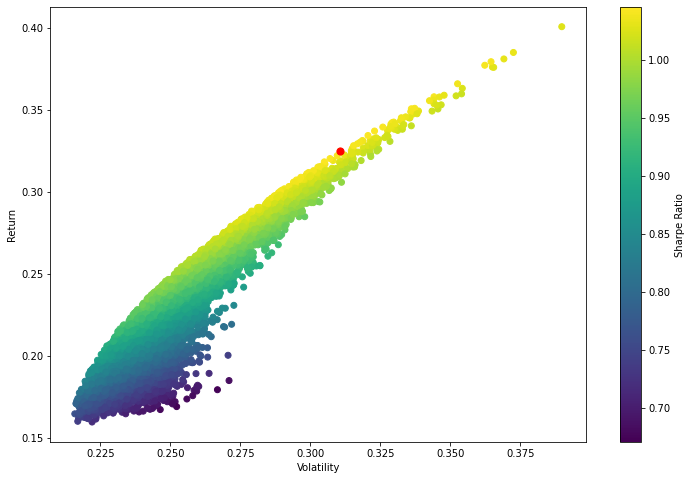

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(maxSR_vol, maxSR_return,c='red', s=50) # red dot
plt.show()

In [33]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [34]:
cons = ({'type':'eq', 'fun':check_sum})
bounds = ((0,1), (0,1), (0,1), (0,1), (0,1))
init_guess = [0.2, 0.2, 0.2, 0.2, 0.2]

In [35]:
opt_results = minimize(neg_sharpe, init_guess,method='SLSQP', bounds=bounds, constraints=cons)
print(opt_results)

     fun: -1.0470120457464878
     jac: array([ 3.84096354e-02, -5.12301922e-05, -3.15755606e-05,  2.60174274e-04,
        5.58644533e-05])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.        , 0.56155407, 0.08418492, 0.05703138, 0.29722964])


In [36]:
get_ret_vol_sr(opt_results.x)

array([0.33916539, 0.32393647, 1.04701205])

In [37]:
frontier_y = np.linspace(0,0.40,200)

In [38]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [39]:
frontier_x = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

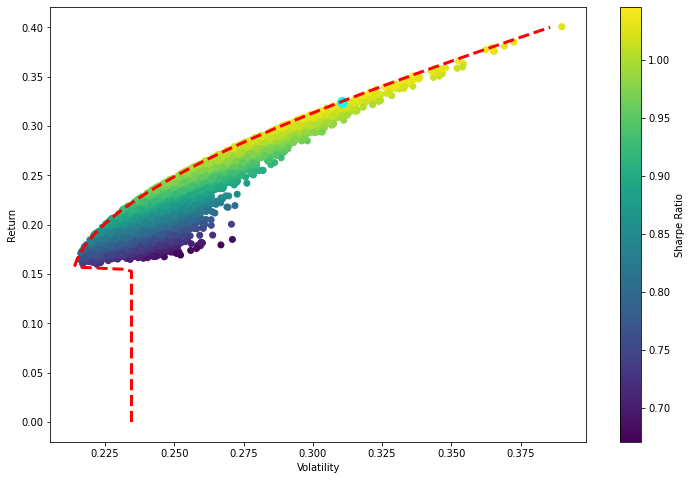

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(maxSR_vol, maxSR_return,c='cyan', s=100) # red dot
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.show()